In [1]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kaggle

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
api = KaggleApi()
api.authenticate()

In [5]:
import kaggle

# Download the dataset
!kaggle datasets download -d saurabhbadole/bank-customer-churn-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
bank-customer-churn-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
import zipfile

# Unzip the file
with zipfile.ZipFile('bank-customer-churn-prediction-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('bank_customer_churn')

In [7]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('bank_customer_churn/Churn_Modelling.csv')

# Take a look at the first few rows
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [8]:
# Check the shape of the dataset (rows, columns)
print(df.shape)

# See the columns in the dataset
print(df.columns)

# Get a quick summary of the dataset
print(df.info())

# See basic statistics
print(df.describe())

(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  Estima

In [9]:
# Check for missing values
print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [10]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [11]:
# Check data types
print(df.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [12]:
# Drop unnecessary columns
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [13]:
!pip install seaborn

<Axes: xlabel='CreditScore'>

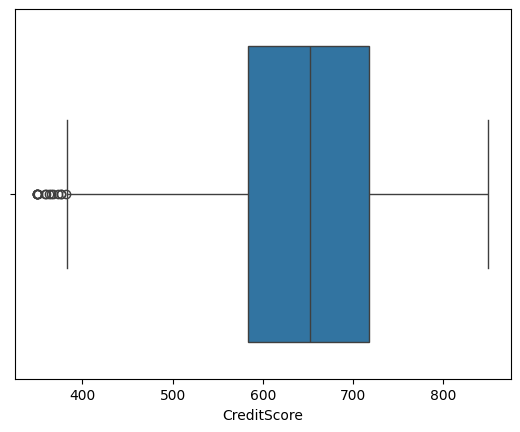

In [14]:
import seaborn as sns

# Create a boxplot for a numeric column
sns.boxplot(x=df['CreditScore'])

In [15]:
# Standardize column names to lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [16]:
# Check unique values in a categorical column
print(df['geography'].unique())

['France' 'Spain' 'Germany']


In [17]:
# Final dataset check
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   creditscore      10000 non-null  int64  
 2   geography        10000 non-null  object 
 3   gender           10000 non-null  object 
 4   age              10000 non-null  int64  
 5   tenure           10000 non-null  int64  
 6   balance          10000 non-null  float64
 7   numofproducts    10000 non-null  int64  
 8   hascrcard        10000 non-null  int64  
 9   isactivemember   10000 non-null  int64  
 10  estimatedsalary  10000 non-null  float64
 11  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None
         rownumber   creditscore           age        tenure        balance  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000   

In [18]:
# Check the first 5 rows
print(df.head())

# Check the number of rows and columns
print("Dataset shape:", df.shape)

# Check column names and data types
print(df.info())

   rownumber  creditscore geography  gender  age  tenure    balance  \
0          1          619    France  Female   42       2       0.00   
1          2          608     Spain  Female   41       1   83807.86   
2          3          502    France  Female   42       8  159660.80   
3          4          699    France  Female   39       1       0.00   
4          5          850     Spain  Female   43       2  125510.82   

   numofproducts  hascrcard  isactivemember  estimatedsalary  exited  
0              1          1               1        101348.88       1  
1              1          0               1        112542.58       0  
2              3          1               0        113931.57       1  
3              2          0               0         93826.63       0  
4              1          1               1         79084.10       0  
Dataset shape: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column 

In [19]:
# Get summary statistics
print(df.describe())

         rownumber   creditscore           age        tenure        balance  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000    650.528800     38.921800      5.012800   76485.889288   
std     2886.89568     96.653299     10.487806      2.892174   62397.405202   
min        1.00000    350.000000     18.000000      0.000000       0.000000   
25%     2500.75000    584.000000     32.000000      3.000000       0.000000   
50%     5000.50000    652.000000     37.000000      5.000000   97198.540000   
75%     7500.25000    718.000000     44.000000      7.000000  127644.240000   
max    10000.00000    850.000000     92.000000     10.000000  250898.090000   

       numofproducts    hascrcard  isactivemember  estimatedsalary  \
count   10000.000000  10000.00000    10000.000000     10000.000000   
mean        1.530200      0.70550        0.515100    100090.239881   
std         0.581654      0.45584        0.499797     57510.492818   
min     

In [20]:
print(df.columns)

Index(['rownumber', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')


exited
0    7963
1    2037
Name: count, dtype: int64


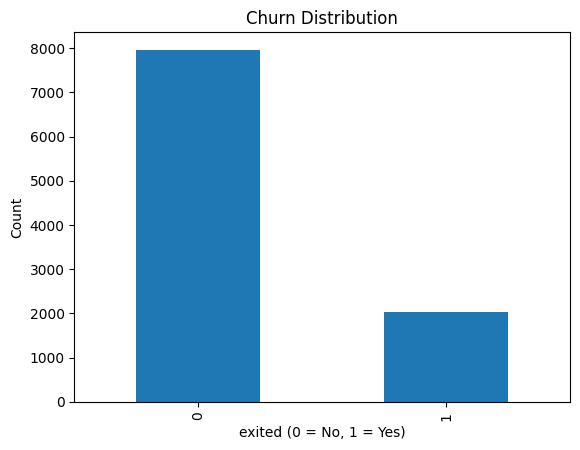

In [21]:
# Check the distribution of the target variable
print(df['exited'].value_counts())

# Plot it
import matplotlib.pyplot as plt

df['exited'].value_counts().plot(kind='bar')
plt.title('Churn Distribution')
plt.xlabel('exited (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


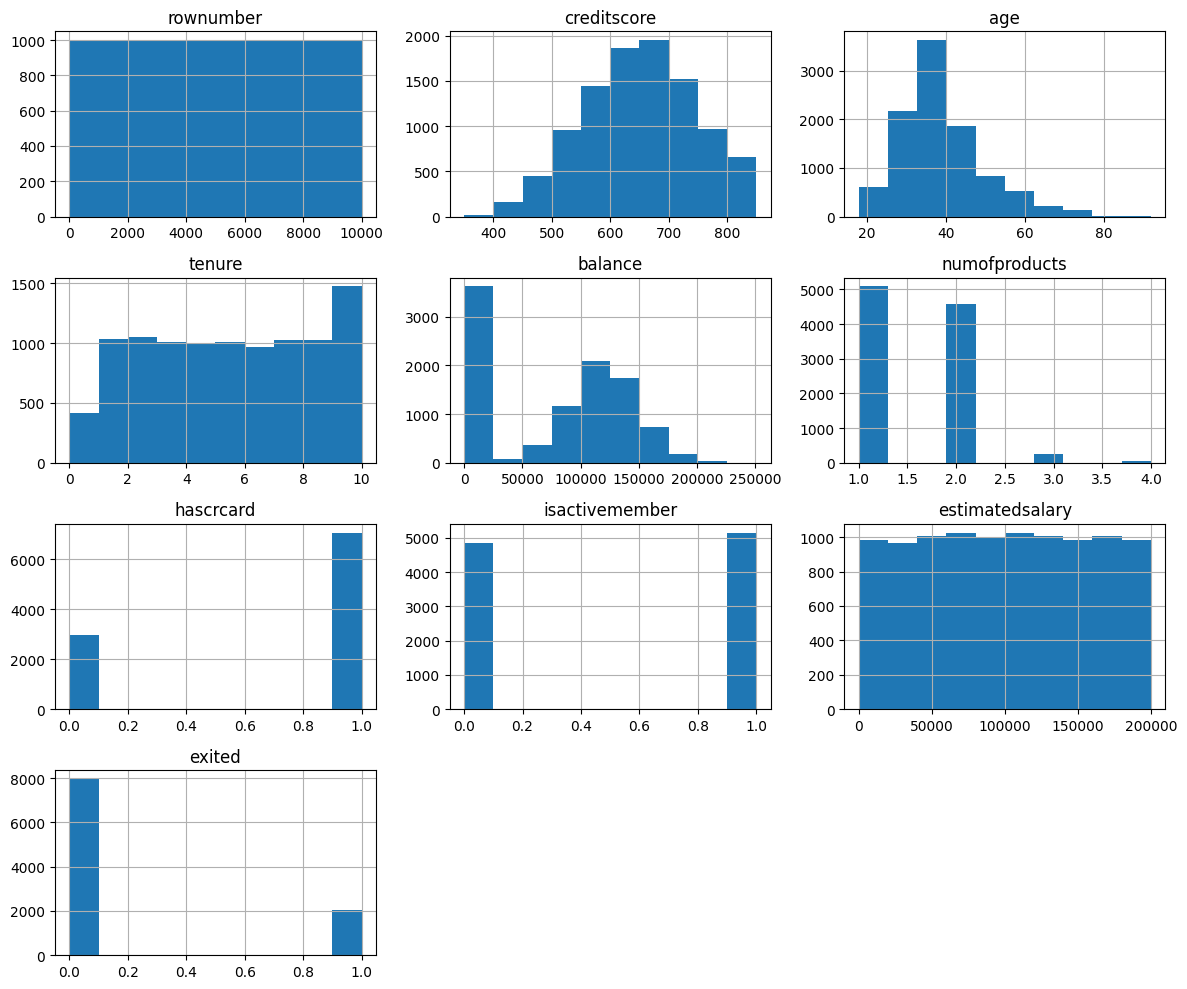

In [22]:
# Plot histograms for all numerical columns
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

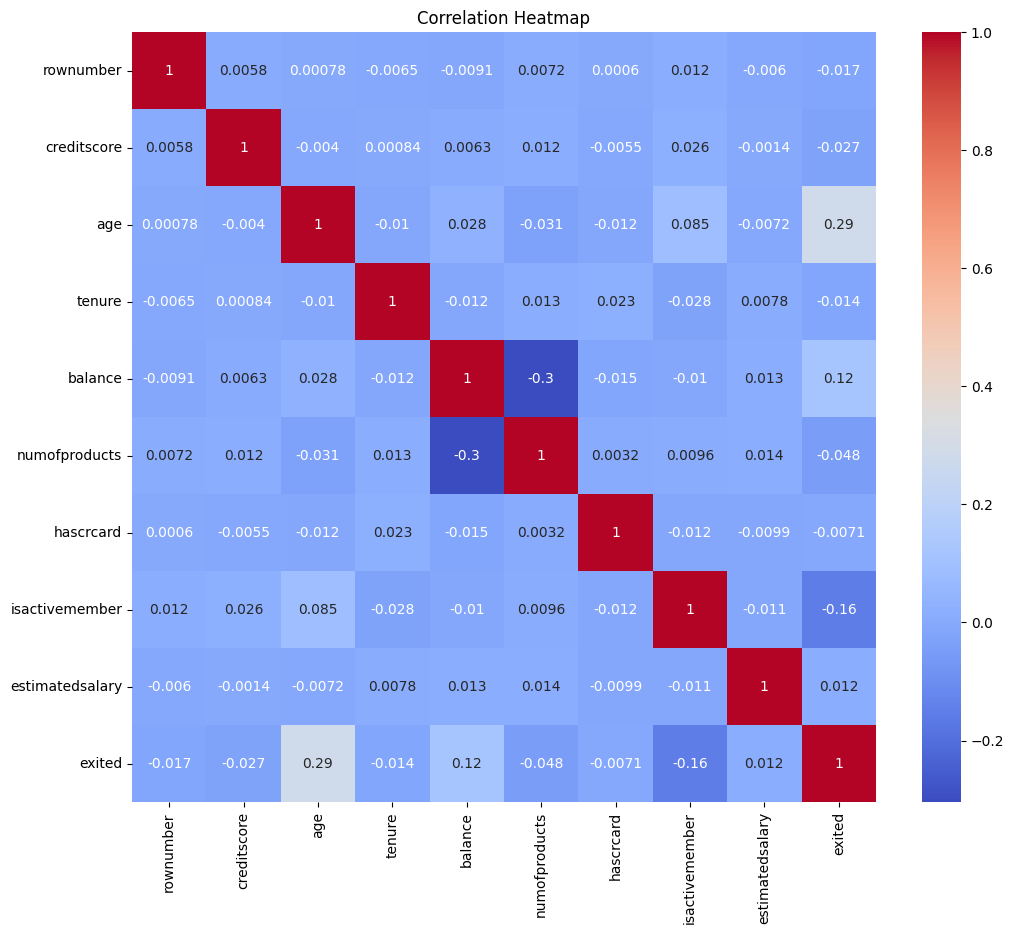

In [23]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

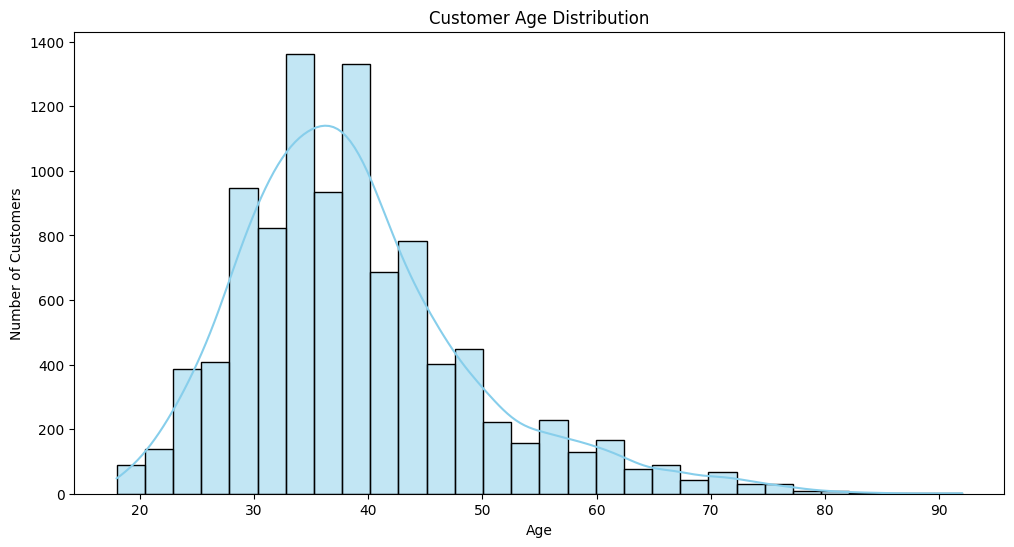

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of customer age
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

<Figure size 800x600 with 0 Axes>

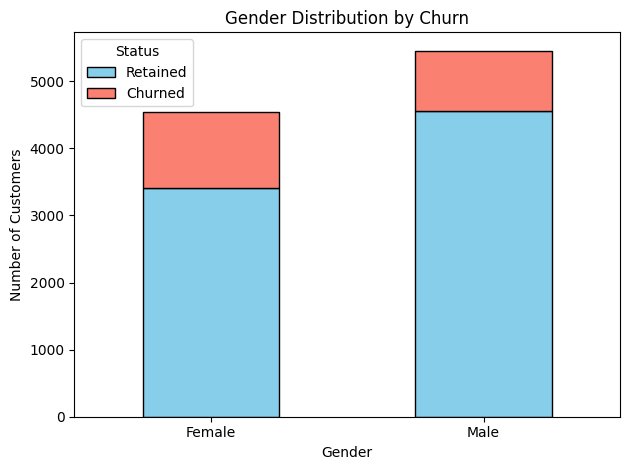

In [25]:
# Bar chart: Gender distribution by churn
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
gender_churn = df.groupby(['gender', 'exited']).size().unstack()
gender_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Gender Distribution by Churn')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(['Retained', 'Churned'], title='Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

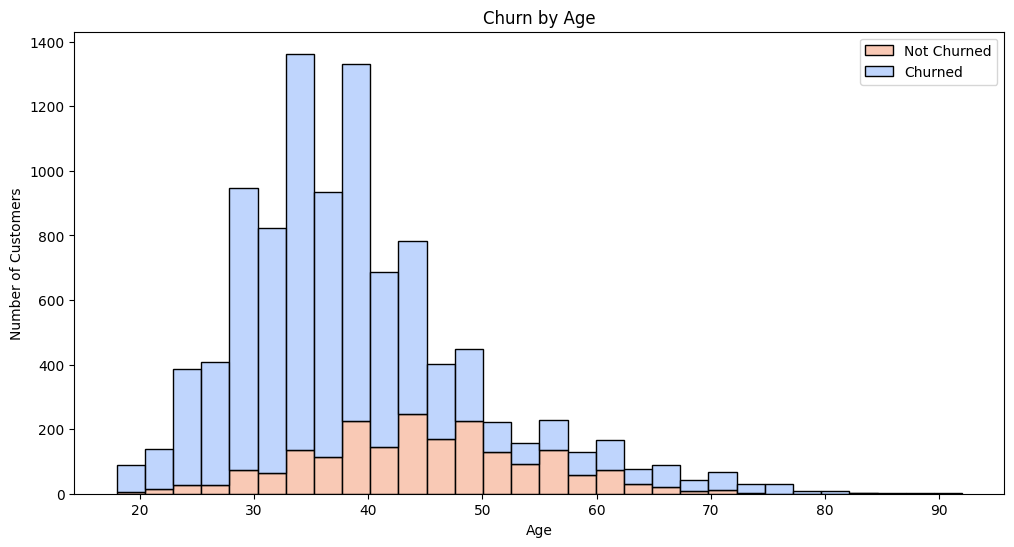

In [26]:
# Plot churn distribution by age
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='exited', multiple='stack', bins=30, palette='coolwarm')
plt.title('Churn by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend(['Not Churned', 'Churned'])
plt.show()

<Figure size 1000x600 with 0 Axes>

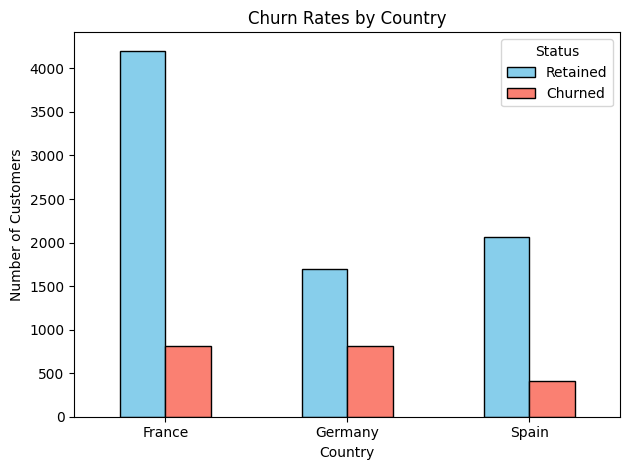

In [27]:
# Grouped bar chart: Churn rates by country
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
geography_churn = df.groupby(['geography', 'exited']).size().unstack()
geography_churn.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], edgecolor='black')
plt.title('Churn Rates by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.legend(['Retained', 'Churned'], title='Status')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

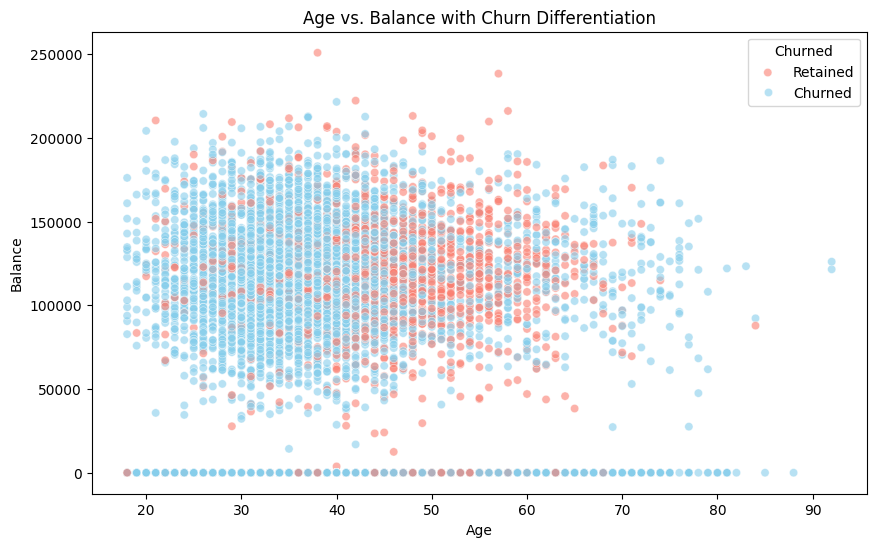

In [28]:
# Scatterplot: Age vs. Balance with churn differentiation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='age',
    y='balance',
    hue='exited',
    palette={0: 'skyblue', 1: 'salmon'},
    alpha=0.6
)
plt.title('Age vs. Balance with Churn Differentiation')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(title='Churned', labels=['Retained', 'Churned'])
plt.show()

In [29]:
df['age_balance_interaction'] = df['age'] * df['balance']

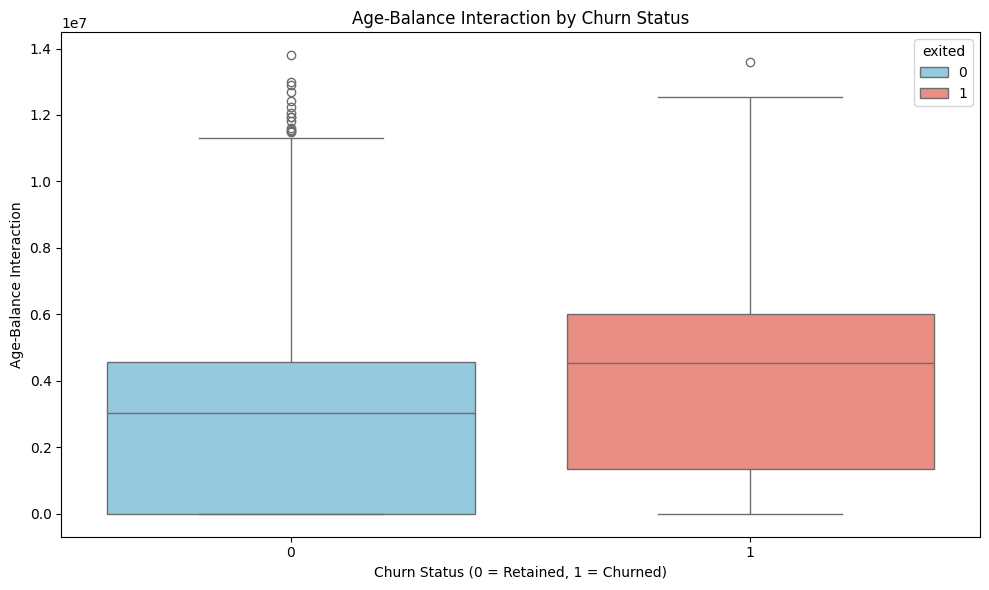

In [30]:
# Boxplot: Age-Balance Interaction by Churn Status
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='exited', 
    y='age_balance_interaction', 
    hue='exited', 
    palette=['skyblue', 'salmon'], 
    dodge=False
)
plt.title('Age-Balance Interaction by Churn Status')
plt.xlabel('Churn Status (0 = Retained, 1 = Churned)')
plt.ylabel('Age-Balance Interaction')
plt.tight_layout()
plt.show()

In [31]:
# Creating the IsHighBalance feature
df['is_high_balance'] = df['balance'] > df['balance'].median()

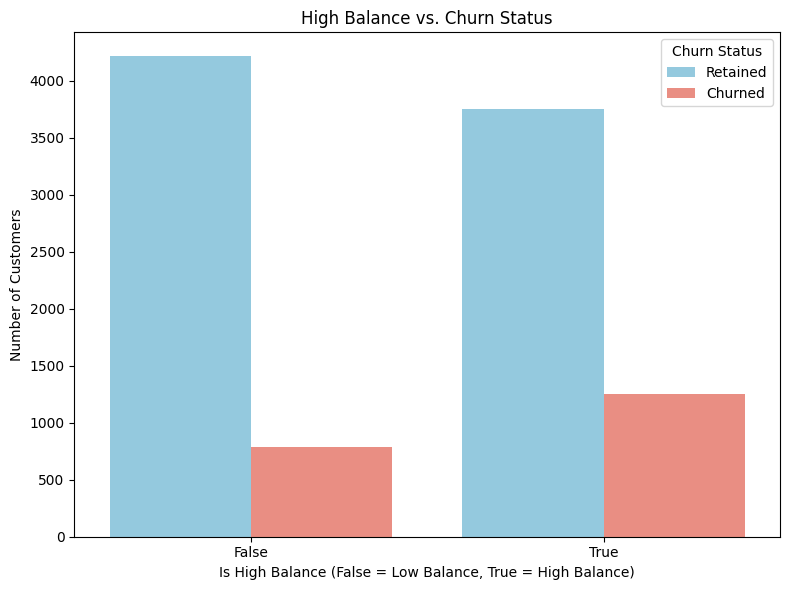

In [32]:
# Bar chart: IsHighBalance vs. Churn Status
plt.figure(figsize=(8, 6))
sns.countplot(
    data=df, 
    x='is_high_balance', 
    hue='exited', 
    palette=['skyblue', 'salmon']
)
plt.title('High Balance vs. Churn Status')
plt.xlabel('Is High Balance (False = Low Balance, True = High Balance)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn Status', labels=['Retained', 'Churned'])
plt.tight_layout()
plt.show()

In [33]:
# Creating the Balance-to-Salary Ratio feature
df['balance_to_salary_ratio'] = df['balance'] / df['estimatedsalary']

In [34]:
df['estimatedsalary'] = df['estimatedsalary'].replace(0, df['estimatedsalary'].median())

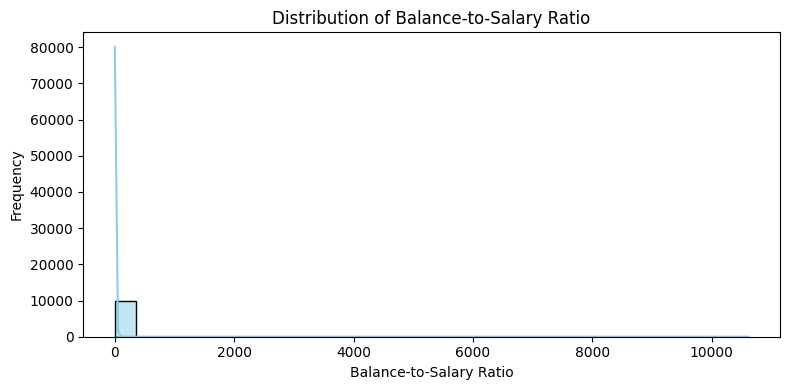

In [35]:
plt.figure(figsize=(8, 4))
sns.histplot(df['balance_to_salary_ratio'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Balance-to-Salary Ratio')
plt.xlabel('Balance-to-Salary Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [36]:
!pip install scikit-learn